In [1]:
#import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from unidecode import unidecode
from scipy import stats
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# read csv file with pandas
data = pd.read_csv('fifa.csv', low_memory=False)

In [4]:
# call first 5 rows
data.head()

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,89,63,89,63,93,95,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,92,48,90,95,95,96,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,56,96,82,95,92,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,88,78,86,60,91,83,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,58,29,52,35,48,70,...,55,25,11,61,44,10,83,70,11,GK


In [5]:
# shape of dataset
data.shape

(17981, 39)

In [6]:
# check info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 17981 non-null  object
 1   Age                  17981 non-null  int64 
 2   Nationality          17981 non-null  object
 3   Overall              17981 non-null  int64 
 4   Acceleration         17981 non-null  object
 5   Aggression           17981 non-null  object
 6   Agility              17981 non-null  object
 7   Balance              17981 non-null  object
 8   Ball control         17981 non-null  object
 9   Composure            17981 non-null  object
 10  Crossing             17981 non-null  object
 11  Curve                17981 non-null  object
 12  Dribbling            17981 non-null  object
 13  Finishing            17981 non-null  object
 14  Free kick accuracy   17981 non-null  object
 15  GK diving            17981 non-null  object
 16  GK h

In [7]:
# check for missing value
data.isnull().sum().sum()

0

In [8]:
# change all column names to lower case for typing ease
data.columns = data.columns.str.lower()

In [9]:
# check the data types and total data type counts 
data.dtypes.value_counts()

object    37
int64      2
dtype: int64

In [10]:
# call all columns to be formatted to int dtype
cols_num = (data.dtypes == 'O').index
cols_num = cols_num.drop(['name','preferred positions','nationality', 'overall','age']).tolist()

In [11]:
# total all un-summed data
for col in cols_num:
    data[col] = data[col].apply(lambda x : eval(x))

In [12]:
# remove all extra spaces in the object type columns
data[['name','preferred positions','nationality']] = data[['name','preferred positions','nationality']].applymap(str.strip)

In [13]:
# transform all latin, german, norwagian, etc. letters to english letters
data.name = data.name.apply(unidecode)

In [14]:
# get dummies for all playing postions in dataframe
data_pos = data['preferred positions'].str.get_dummies(sep = ' ')
data_pos

,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
17977,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
17978,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
17979,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [15]:
# data.sample(10)
positions = 'GK CB LB RB CM RM LM RW LW ST'.split(' ')

In [16]:
# get all playing postions of the player
data['num of position'] = data['preferred positions'].apply(lambda x: len(x.split()))

# set the first postion as the most preferres position 
data['main position'] = data['preferred positions'].apply(lambda x: x if x in positions and x.split()[0].strip() else x if x in positions else x.split()[0].strip())

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,17981.0,25.144541,4.614272,16.0,21.0,25.0,28.0,47.0
overall,17981.0,66.247984,6.987965,46.0,62.0,66.0,71.0,94.0
acceleration,17981.0,103.362327,984.877556,11.0,56.0,67.0,75.0,33270.0
aggression,17981.0,77.572938,767.663944,11.0,43.0,59.0,69.0,43130.0
agility,17981.0,98.081475,909.695941,14.0,55.0,65.0,74.0,30164.0
balance,17981.0,86.581225,751.287441,11.0,56.0,66.0,74.0,31472.0
ball control,17981.0,121.133530,1232.914608,8.0,53.0,63.0,69.0,43145.0
composure,17981.0,103.637506,1026.429722,5.0,51.0,60.0,67.0,27150.0
crossing,17981.0,86.470107,910.701596,5.0,38.0,54.0,64.0,27150.0
curve,17981.0,62.597631,622.736138,6.0,34.0,49.0,62.0,43131.0


There are many outliers in most column of which the maximum score is supposed to be 100

In [18]:
# replace all outliers in the dataset with the median of players postion's category  
data_cleaned = data.copy()
for col in cols_num:
    data_cleaned[col] = data.groupby('main position')[col].transform(lambda x: x.median() if (x > 100).any() else x).astype('int')

In [36]:
all_positions = data_cleaned['preferred positions'].str.get_dummies(' ').columns.tolist()
all_positions

['CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'GK',
 'LB',
 'LM',
 'LW',
 'LWB',
 'RB',
 'RM',
 'RW',
 'RWB',
 'ST']

In [19]:
# rank goal kepeper in the world according to their overall ranking
gk_data = data_cleaned.loc[data_cleaned['preferred positions'] == 'GK'].sort_values('overall',ascending = False)
gk_data.loc[:,['name','nationality','overall']].reset_index(drop = True)

,name,nationality,overall
0,M. Neuer,Germany,92
1,De Gea,Spain,90
2,T. Courtois,Belgium,89
3,G. Buffon,Italy,89
4,J. Oblak,Slovenia,88
...,...,...,...
2024,A. Dillon,Republic of Ireland,48
2025,M. McElhinney,Republic of Ireland,48
2026,M. Hurst,Scotland,48
2027,A. Kelsey,England,46


In [38]:
len(all_positions)

15

In [41]:
#best players for each feature and their score
best_player_feature = pd.concat([data_cleaned.set_index(['name'])[cols_num].idxmax(),data_cleaned[cols_num].max(0)],axis = 1).reset_index()
best_player_feature.columns = ['feature','name','score']
best_player_feature

,feature,name,score
0,acceleration,Lucas,95
1,aggression,S. Dubarbier,90
2,agility,Neymar,96
3,balance,Bernard,96
4,ball control,L. Messi,95
5,composure,Neymar,92
6,crossing,K. Walker,65
7,curve,M. Reus,90
8,dribbling,A. Masuaku,80
9,finishing,Neymar,89


In [42]:
# best player for each player position with their correspponding overall score and nationality
data_cleaned.groupby(['main position'])[['overall','name','nationality']].first()

,overall,name,nationality
main position,,,
CAM,86,Coutinho,Brazil
CB,90,Sergio Ramos,Spain
CDM,90,T. Kroos,Germany
CF,83,S. Kagawa,Japan
CM,87,N. Kante,France
GK,92,M. Neuer,Germany
LB,87,Marcelo,Brazil
LM,87,C. Eriksen,Denmark
LW,92,Neymar,Brazil


In [39]:
data_cleaned.select_dtypes('number').max()

age                   47
overall               94
acceleration          95
aggression            90
agility               96
balance               96
ball control          95
composure             92
crossing              65
curve                 90
dribbling             80
finishing             89
free kick accuracy    90
gk diving             65
gk handling           63
gk kicking            61
gk positioning        64
gk reflexes           66
heading accuracy      88
interceptions         85
jumping               93
long passing          86
long shots            90
marking               82
penalties             90
positioning           91
reactions             95
short passing         89
shot power            91
sliding tackle        85
sprint speed          95
stamina               95
standing tackle       84
strength              89
vision                90
volleys               91
num of position        4
dtype: int64

In [44]:
# average of each country's player overall score sorted by size(number of players) and mean of overall score
country_avg_score = data_cleaned.groupby('nationality')['overall'].agg(['size','sum','mean']).sort_values( by = ['size','mean'], ascending = False).reset_index()
country_avg_score

,nationality,size,sum,mean
0,England,1630,102804,63.069939
1,Germany,1140,75127,65.900877
2,Spain,1019,71268,69.939156
3,France,978,65806,67.286299
4,Argentina,965,65394,67.765803
...,...,...,...,...
160,Sri Lanka,1,60,60.000000
161,Kyrgyzstan,1,58,58.000000
162,Brunei Darussalam,1,55,55.000000
163,Hong Kong,1,54,54.000000


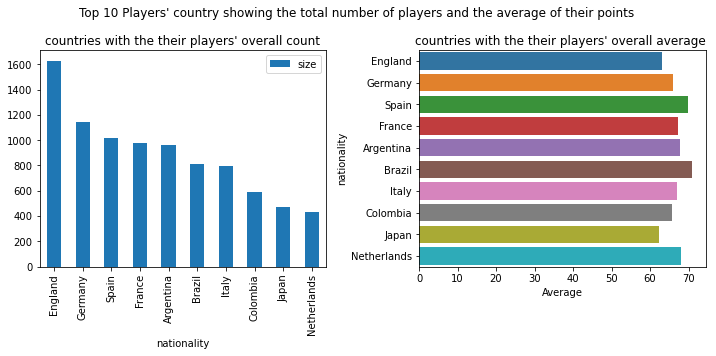

In [79]:
fig, axes = plt.subplots(1,2, figsize = (10,5))
axes = axes.flatten()
country_avg_score[:10].plot.bar(x = 'nationality', y = 'size', ax= axes[0])

sns.barplot( data = country_avg_score[:10],  x = 'mean', y= 'nationality', ax = axes[1])
axes[1].set_title('countries with the their players\' overall average ')
axes[0].set_title('countries with the their players\' overall count')
plt.xlabel('Average')
plt.suptitle('Top 10 Players\' country showing the total number of players and the average of their points' )
plt.tight_layout()
plt.show()

In [ ]:
plt.xticks(ax.get_xticks())

Text(0.5, 1.0, 'Top 10 countries with the highest players and their average')

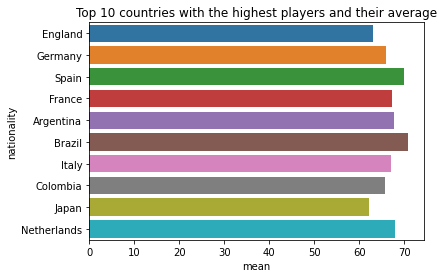

### Overview of Nigerian Players

In [80]:
# All Nigerian players according to their overall ranking
nga_players = data_cleaned[(data_cleaned['nationality'] == 'Nigeria')].sort_values(by = 'overall', ascending = False).reset_index(drop = True)
nga_players

,name,age,nationality,overall,acceleration,aggression,agility,balance,ball control,composure,...,sliding tackle,sprint speed,stamina,standing tackle,strength,vision,volleys,preferred positions,num of position,main position
0,V. Enyeama,34,Nigeria,80,40,39,38,43,20,24,...,11,41,31,12,62,35,11,GK,1,GK
1,V. Moses,26,Nigeria,79,75,54,75,73,67,61,...,38,75,68,40,60,61,53,LM RM RWB,3,LM
2,O. Ndidi,20,Nigeria,77,66,63,67,69,66,62,...,57,66,71,60,65,63,47,CM CDM,2,CM
3,A. Musa,24,Nigeria,76,75,54,75,73,67,61,...,38,75,68,40,60,61,53,LM ST,2,LM
4,L. Balogun,29,Nigeria,75,71,66,66,52,61,72,...,65,71,71,66,68,49,36,RB CB,2,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,C. Egbuchulam,25,Nigeria,56,70,53,67,65,65,61,...,15,71,65,24,71,55,59,ST,1,ST
122,F. Shomotun,20,Nigeria,55,76,54,75,73,67,61,...,38,76,69,40,60,64,36,RM CAM,2,RM
123,I. Boye,20,Nigeria,55,70,53,67,65,65,61,...,17,71,65,24,71,55,59,ST,1,ST
124,F. Onyeka,19,Nigeria,53,66,63,67,69,66,62,...,57,66,71,60,65,63,47,CM,1,CM


Text(0.5, 0, "Number of Players' position")

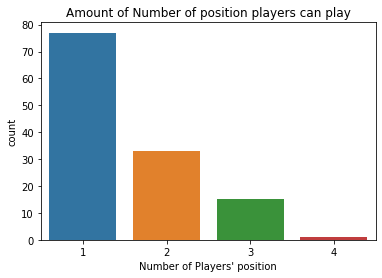

In [88]:
sns.countplot(data = nga_players, x= 'num of position')
plt.title('Amount of Number of position players can play')
plt.xlabel('Number of Players\' position')


Text(0.5, 1.0, 'Age distribution of Nigerian players')

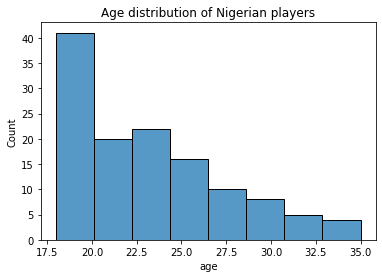

In [81]:
sns.histplot( data = nga_players, x= 'age')
plt.title('Age distribution of Nigerian players')

The graph above shows that most of the Nigerian players are very young

Text(0.5, 1.0, 'Distribution of overall score of Nigerian players')

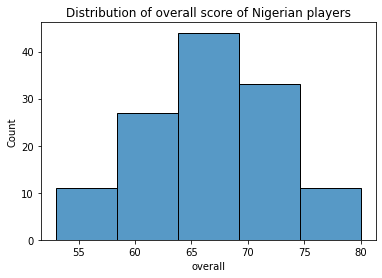

In [89]:
sns.histplot(data = nga_players, x = 'overall', bins = 5)
plt.title('Distribution of overall score of Nigerian players')

In [94]:
#best players for each feature and their score
players_feat_NGA = pd.concat([data_cleaned[data_cleaned['nationality'] == 'Nigeria'].set_index(['name'])[cols_num].idxmax(),data_cleaned[data_cleaned['nationality'] == 'Nigeria'][cols_num].max(0)],axis = 1).reset_index()
players_feat_NGA.columns = ['feature','name','score']
players_feat_NGA

,feature,name,score
0,acceleration,K. Fatai,86
1,aggression,E. Echiejile,80
2,agility,E. Dennis,81
3,balance,I. Uzochukwu,86
4,ball control,C. Ezeh,78
5,composure,L. Balogun,72
6,crossing,E. Echiejile,64
7,curve,O. Onazi,75
8,dribbling,E. Dennis,70
9,finishing,E. Dennis,71


In [95]:
# utility players in Nigeria i.e Players who can play more than two position
utility_NGA = data_cleaned[(data_cleaned['nationality'] == 'Nigeria') & (data_cleaned['num of position'] >= 3)]
utility_NGA.sort_values(by = 'overall', ascending = False)

,name,age,nationality,overall,acceleration,aggression,agility,balance,ball control,composure,...,sliding tackle,sprint speed,stamina,standing tackle,strength,vision,volleys,preferred positions,num of position,main position
653,V. Moses,26,Nigeria,79,75,54,75,73,67,61,...,38,75,68,40,60,61,53,LM RM RWB,3,LM
2198,S. Igboun,26,Nigeria,74,76,54,75,73,67,61,...,38,76,69,40,60,63,56,RM LM ST,3,RM
2278,Nosa,26,Nigeria,74,71,69,72,73,68,63,...,40,70,83,42,60,65,55,CAM CDM CM,3,CAM
2530,S. Aluko,28,Nigeria,74,70,53,67,65,65,61,...,35,71,65,24,71,55,59,ST CF RW,3,ST
2585,M. Simon,21,Nigeria,74,75,54,75,73,67,61,...,38,75,68,40,60,61,53,LM ST CF,3,LM
3078,I. Success,21,Nigeria,73,70,53,67,65,65,61,...,24,71,65,24,71,55,59,ST RM LM,3,ST
3202,P. Etebo,21,Nigeria,73,71,47,72,73,68,63,...,40,70,68,42,60,65,55,CAM ST LM,3,CAM
3216,R. Lawal,27,Nigeria,73,71,77,72,73,68,63,...,40,70,89,42,60,65,55,CAM CM CDM,3,CAM
4015,E. Echiejile,29,Nigeria,71,72,80,70,67,66,49,...,72,73,80,74,77,59,49,LWB LM LB,3,LWB
4194,S. Adegbenro,21,Nigeria,71,70,53,67,65,65,61,...,23,71,65,24,71,55,59,ST RW LW,3,ST


#####  Getting dummies of nationality and positions

In [99]:
data_scores = data.drop(['main position', 'preferred positions','nationality','name'], axis = 1)
country_data = data['nationality'].str.get_dummies()
country_data

,Afghanistan,Albania,Algeria,Angola,Antigua & Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Uganda,Ukraine,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Wales,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# get dummies for all playing postions in dataframe
data_pos = data['preferred positions'].str.get_dummies(sep = ' ')
data_pos

,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
17977,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
17978,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
17979,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## Data Modeling

In [98]:
data_4_model = pd.concat([data_scores,country_data,data_pos],axis = 1)
data_4_model.head()

,age,overall,acceleration,aggression,agility,balance,ball control,composure,crossing,curve,...,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,32,94,89,63,89,63,93,95,85,81,...,0,0,0,1,0,0,0,0,0,1
1,30,93,92,48,90,95,95,96,77,89,...,0,0,0,0,0,0,0,1,0,0
2,25,92,94,56,96,82,95,92,75,81,...,0,0,0,1,0,0,0,0,0,0
3,30,92,88,78,86,60,91,83,77,86,...,0,0,0,0,0,0,0,0,0,1
4,31,92,58,29,52,35,48,70,15,14,...,1,0,0,0,0,0,0,0,0,0


In [100]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [103]:
ss = StandardScaler()
ss_country = ss.fit_transform(country_data)

In [110]:
X = data_4_model.drop(['overall'], axis = 1)
y =  data_4_model['overall']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=.3, shuffle= True)

In [113]:
rfr = RandomForestRegressor(random_state=12, bootstrap=False)

In [114]:
rfr.fit(train_X, train_y)

RandomForestRegressor(bootstrap=False, random_state=12)

In [115]:
rfr.score(train_X, train_y)

1.0

In [116]:
rfr.score(test_X, test_y)

0.8964379598026794

In [123]:
y_pred = rfr.predict(test_X)

In [126]:
pd.concat([pd.Series(test_y,name= 'true y').reset_index(drop =True),pd.Series(y_pred.round(), name="Predicted y")],axis = 1).astype(int).sample(10)

,true y,Predicted y
4378,75,73
5218,70,71
310,66,68
238,70,75
1738,70,69
1682,67,66
5017,70,70
4556,68,68
4683,59,61
286,68,68


<AxesSubplot:xlabel='overall', ylabel='Density'>

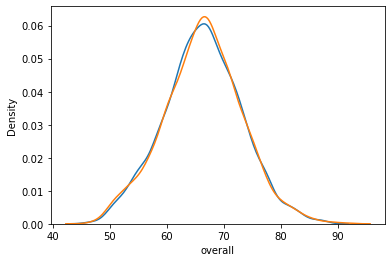

In [125]:
sns.distplot(y_pred,hist = False)
sns.distplot(test_y,hist = False)

In [132]:
test_X.columns

Index(['age', 'acceleration', 'aggression', 'agility', 'balance',
       'ball control', 'composure', 'crossing', 'curve', 'dribbling',
       ...
       'GK', 'LB', 'LM', 'LW', 'LWB', 'RB', 'RM', 'RW', 'RWB', 'ST'],
      dtype='object', length=216)

In [133]:
feature_importance = pd.DataFrame(zip(test_X.columns,rfr.feature_importances_)).rename(columns = {0:'feature',1:'importance'})
feature_importance = feature_importance.sort_values(by ='importance',ascending=False).reset_index(drop = True)

In [137]:
feature_importance.head()

,feature,importance
0,reactions,0.644331
1,ball control,0.090562
2,standing tackle,0.048386
3,marking,0.027563
4,composure,0.023012


Text(0.5, 1.0, 'Top 20 feature importances of model')

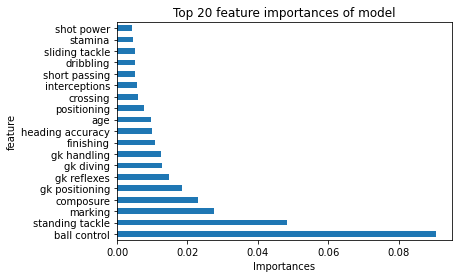

In [140]:
ax = feature_importance.iloc[1:20,:].plot.barh(x ='feature', y= 'importance', legend = False)
ax.set_xlabel('Importances')
ax.set_title('Top 20 feature importances of model')

### Hypothesis Testing
H<i><sub>1</sub> : The number of positions of a player affects the overall performance</i> 

In [ ]:
pd.crosstab(data['overall'],data['num of position'], margins = True).reset_index()